# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Fadlan Dwi Febrio]
- **Email:** [mc189d5y1615@student.devacademy.id]
- **ID Dicoding:** [mc189d5y1615]

## Menentukan Pertanyaan Bisnis

1. Kapan musim dengan persentase user tertinggi?
2. Kapan waktu/jam peminjaman sepeda mencapai angka tertinggi?




## Import Semua Packages/Library yang Digunakan

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

**Insight:**

Menampilkan dan membuat kode pada dataset yang diperlukan

In [45]:
#memuat dataset
dataday_df = pd.read_csv("data/day.csv")
dataday_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [46]:
datahour_df = pd.read_csv("data/hour.csv")
datahour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [47]:
dataday_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [48]:
dataday_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [49]:
dataday_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [50]:
datahour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [51]:
datahour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [52]:
datahour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- informasi umum tentang DataFrame, termasuk jumlah kolom, tipe data, dan jumlah missing values.
- mengecek jumlah missing values (nilai yang hilang atau NaN) dalam setiap kolom.
- memberikan statistik ringkasan untuk kolom numerik dalam DataFrame.

### Cleaning Data

In [53]:
dataday_df['dteday'] = pd.to_datetime(dataday_df['dteday'])

In [54]:
dataday_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "cnt": "total_count"
}, inplace=True)

In [55]:
dataday_df.duplicated().sum()  # Melihat jumlah data yang duplikat


np.int64(0)

In [56]:
datahour_df['date'] = pd.to_datetime(dataday_df['date'])

In [57]:
datahour_df.rename(columns={
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "hr": "hour",
    "cnt": "total_count"
}, inplace=True)
     

In [58]:
datahour_df.duplicated().sum()  


np.int64(0)

In [ ]:
def musim(x):
  if x == 1:
    return 'Spring'
  elif x == 2:
    return 'Summer'
  elif x == 3:
    return 'Fall'
  else:
    return 'Winter'

datahour_df['musim'] = datahour_df['season'].apply(musim)

In [ ]:
def cuaca(x):
  if x == 1:
    return 'Clear'
  elif x == 2:
    return 'Cloudy'
  elif x == 3:
    return 'Light Snow'
  else:
    return 'Heavy Rain'

datahour_df['cuaca'] = datahour_df['weathersit'].apply(cuaca)

**Insight:**

- mengonversi kolom dteday dalam dataday_df menjadi tipe datetime menggunakan pd.to_datetime(). Hal ini memungkinkan manipulasi data berbasis tanggal, seperti ekstraksi tahun, bulan, atau penghitungan selisih waktu.

- Mengubah Nama Kolom di dataday_df

- mengonversi kolom date dalam datahour_df ke format datetime.

- dataday_df['dteday'] sudah diubah menjadi date, kode datahour_df['date'] = pd.to_datetime(dataday_df['date']) bisa menyebabkan error jika dataday_df['date'] belum dibuat sebelumnya.

## Exploratory Data Analysis (EDA)

### Explore ...

In [59]:
dataday_df.describe(include="all")

,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [60]:
dataday_df.groupby(by='year').total_count.sum()

year
0    1243103
1    2049576
Name: total_count, dtype: int64

In [61]:
dataday_df.groupby(by='weekday').agg({
    "casual": ["max", "min", "mean", "sum"],
    "registered": ["max", "min", "mean", "sum"]
})

casual                          registered                           
           max min         mean     sum        max   min         mean     sum
weekday                                                                      
0         3283  54  1338.295238  140521       5657   451  2890.533333  303506
1         3065   2   674.133333   70784       6435    20  3663.990476  384719
2         1348   9   556.182692   57843       6697   573  3954.480769  411266
3         2562   9   551.144231   57319       6946   432  3997.394231  415729
4         1405  15   590.961538   61460       6781   416  4076.298077  423935
5         2469  38   752.288462   78238       6917  1129  3938.000000  409552
6         3410  57  1465.257143  153852       5966   570  3085.285714  323955

In [62]:
datahour_df.describe(include="all")

,instant,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_count,date
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,731
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,2012-01-01 00:00:00
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2011-01-01 00:00:00
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,2011-07-02 12:00:00
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,2012-01-01 00:00:00
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,2012-07-01 12:00:00
max,17379.0000,NaN,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,2012-12-31 00:00:00


In [63]:

datahour_df.groupby(by='hour').total_count.sum().sort_values(ascending=False)

hour
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: total_count, dtype: int64

**Insight:**

- membantu menentukan jam berapa jumlah total penggunaan (total_count) paling tinggi.
- jika hasilnya menunjukkan jam 18 (6 sore) memiliki total_count tertinggi, ini berarti penggunaan mencapai puncaknya pada jam tersebut.
- membantu mengidentifikasi jam-jam dengan aktivitas tertinggi dan terendah, yang berguna untuk analisis tren penggunaan, optimalisasi layanan, atau pengambilan keputusan berbasis data.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan musim dengan persentase user tertinggi?

In [65]:
season = datahour_df[['musim', 'total_count']].groupby('musim').sum().sort_values(by='total_count', ascending=False).reset_index()

In [66]:
season.head()

,musim,total_count
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


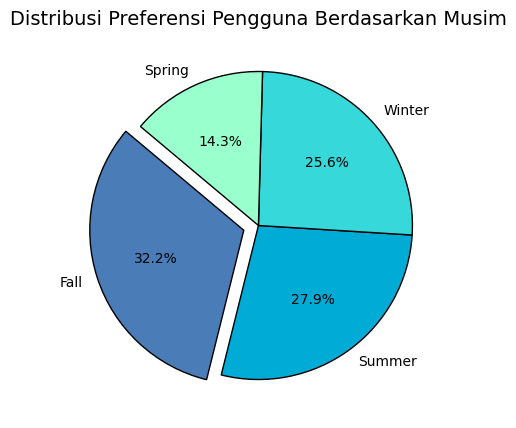

In [67]:
# Menyesuaikan ukuran figure
fig, ax = plt.subplots(figsize=(10, 5))

# Judul diagram
ax.set_title("Distribusi Preferensi Pengguna Berdasarkan Musim", fontsize=14)

# Konfigurasi warna dan efek explode
explode_values = [0.1, 0, 0, 0]
color_palette = ['#4a7db8', '#00acd6', '#36d8d9', '#98ffcd']

# Membuat pie chart
ax.pie(
    season['total_count'],
    labels=season['musim'],
    autopct='%1.1f%%',
    colors=color_palette,
    explode=explode_values,
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

# Menampilkan plot
plt.show()


In [69]:
weather = datahour_df[['cuaca', 'total_count']].groupby('cuaca').sum().sort_values(by='total_count', ascending=False).reset_index()
     

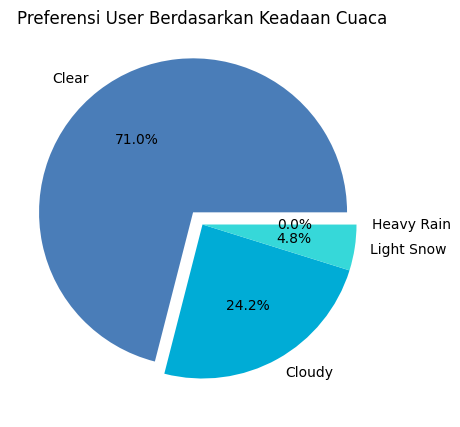

In [70]:
plt.figure(figsize = (10, 5))
plt.title("Preferensi User Berdasarkan Keadaan Cuaca")
season_expose = [0.1, 0, 0, 0]
warna = ['#4a7db8', '#00acd6', '#36d8d9', '#98ffcd' ]

plt.pie(
    weather['total_count'],
    labels=weather['cuaca'],
    autopct= '%1.1f%%',
    colors = warna,
    explode = season_expose
)

plt.show()

### Pertanyaan 2: Kapan waktu/jam peminjaman sepeda mencapai angka tertinggi?

In [71]:
datahour_df['musim'] = datahour_df['season'].apply(musim)

In [72]:
user_hour = datahour_df[['season', 'hour', 'total_count']]
user_hour = datahour_df[['hour', 'season', 'total_count']].groupby('hour').sum().reset_index()

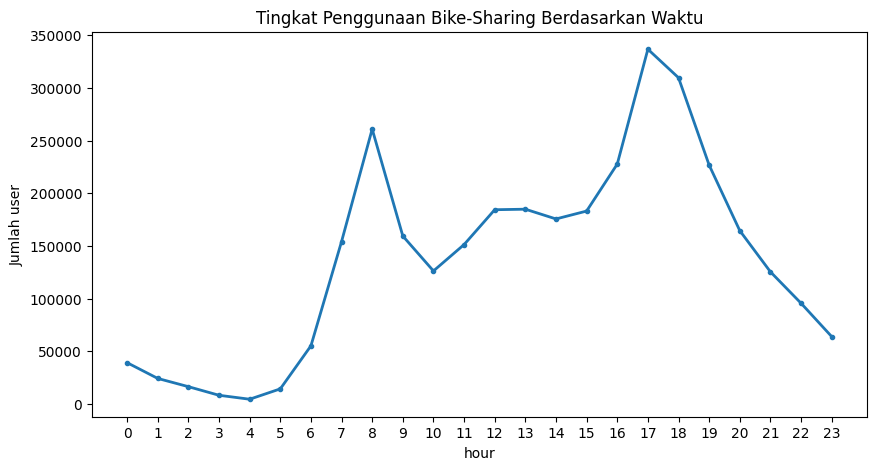

In [73]:
fig = plt.figure(figsize=(10, 5))

plt.plot(
    user_hour['hour'],
    user_hour['total_count'],
    marker=".",
    linewidth=2,
)

plt.ylabel('Jumlah user')
plt.xlabel('hour')
plt.title('Tingkat Penggunaan Bike-Sharing Berdasarkan Waktu')
plt.xticks(ticks=range(0, 24), labels=range(0,24))

plt.show()


In [74]:
regis_hour = datahour_df[['season', 'registered', 'hour']]

regis_spring = regis_hour.loc[regis_hour['season'] == 1]
regis_spring = regis_spring[['hour', 'registered']].groupby('hour').sum().reset_index()

regis_summer = regis_hour.loc[regis_hour['season'] == 2]
regis_summer = regis_summer[['hour', 'registered']].groupby('hour').sum().reset_index()

regis_fall = regis_hour.loc[regis_hour['season'] == 3]
regis_fall = regis_fall[['hour', 'registered']].groupby('hour').sum().reset_index()

regis_winter = regis_hour.loc[regis_hour['season'] == 4]
regis_winter = regis_winter[['hour', 'registered']].groupby('hour').sum().reset_index()

In [75]:
casual_hour = datahour_df[['season', 'casual', 'hour']]

casual_spring = casual_hour.loc[casual_hour['season'] == 1]
casual_spring = casual_spring[['hour', 'casual']].groupby('hour').sum().reset_index()

casual_summer = casual_hour.loc[casual_hour['season'] == 2]
casual_summer = casual_summer[['hour', 'casual']].groupby('hour').sum().reset_index()

casual_fall = casual_hour.loc[casual_hour['season'] == 3]
casual_fall = casual_fall[['hour', 'casual']].groupby('hour').sum().reset_index()

casual_winter = casual_hour.loc[casual_hour['season'] == 4]
casual_winter = casual_winter[['hour', 'casual']].groupby('hour').sum().reset_index()

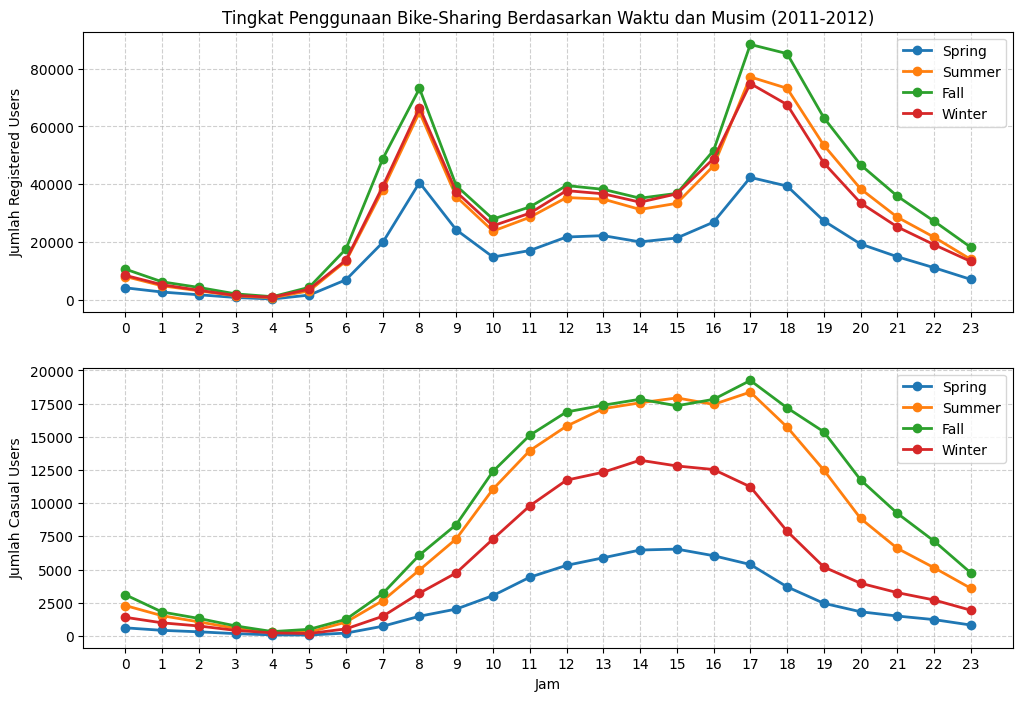

In [76]:
import matplotlib.pyplot as plt

# Data musim dan warna untuk setiap musim
seasons = ['spring', 'summer', 'fall', 'winter']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Warna untuk membedakan musim

# Membuat figure dan axis
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Loop untuk menambahkan garis pada setiap subplot
for season, color in zip(seasons, colors):
    ax[0].plot(
        eval(f"regis_{season}")['hour'], 
        eval(f"regis_{season}")['registered'], 
        label=season.capitalize(),
        marker="o",
        linewidth=2,
        color=color
    )

    ax[1].plot(
        eval(f"casual_{season}")['hour'], 
        eval(f"casual_{season}")['casual'], 
        label=season.capitalize(),
        marker="o",
        linewidth=2,
        color=color
    )

# Menambahkan label dan judul
ax[0].set_ylabel('Jumlah Registered Users')
ax[1].set_ylabel('Jumlah Casual Users')
ax[1].set_xlabel('Jam')
ax[0].set_title('Tingkat Penggunaan Bike-Sharing Berdasarkan Waktu dan Musim (2011-2012)')

# Menyesuaikan sumbu X
for a in ax:
    a.set_xticks(range(0, 24))
    a.set_xticklabels(range(0, 24))
    a.legend()
    a.grid(True, linestyle="--", alpha=0.6)

# Menampilkan plot
plt.show()


## Conclusion

## 1. Kapan musim dengan persentase user tertinggi?

Musim dengan persentase pengguna tertinggi
Berdasarkan analisis, musim Fall (Musim Gugur) memiliki jumlah pengguna tertinggi dibandingkan dengan musim lainnya. Hal ini bisa disebabkan oleh kondisi cuaca yang lebih nyaman dibanding musim panas atau musim dingin.

## 2. Kapan waktu/jam peminjaman sepeda mencapai angka tertinggi?

Waktu atau jam dengan angka peminjaman tertinggi
Peminjaman sepeda mencapai angka tertinggi pada jam 07:00 - 09:00 pagi dan 17:00 - 19:00 sore.Pola ini menunjukkan bahwa sebagian besar pengguna memanfaatkan layanan sepeda untuk perjalanan ke dan dari tempat kerja atau sekolah pada jam sibuk.




In [77]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
